In [8]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
# Load GDP data
data_gdp = pd.read_csv("gdp_quarterly_2013_2023.csv")
data_gdp['Date'] = pd.to_datetime(data_gdp['Date'])
data_gdp.set_index('Date', inplace=True)

# Extract GDP series for modeling
gdp_series = data_gdp['Quarterly_GDP']

# Display the data
gdp_series.head()


Date
2013-03-31    1104874.556
2013-06-30    1255539.269
2013-09-30    1305760.839
2013-12-31    1355982.410
2014-03-31    1206944.098
Name: Quarterly_GDP, dtype: float64

In [10]:
# Placeholder for selected features with GDP (assuming X is defined)
# Example: X could be a DataFrame containing bank-related features for each quarter
# Replace this part with actual features if available
selected_features = ['roe', 'roa', 'interestMargin', 'badDebtPercentage', 'provisionOnBadDebt', 'equityOnTotalAsset']
X = pd.DataFrame(np.random.rand(len(gdp_series), len(selected_features)), columns=selected_features, index=gdp_series.index)
y = gdp_series

# Calculate correlation with GDP
correlation_selected = X.corrwith(y)

# Create a correlation summary with dummy values for additional columns
correlation_summary = pd.DataFrame({
    "Variable": correlation_selected.index,
    "coef": correlation_selected.values,
    "std err": np.random.uniform(0.01, 0.05, len(correlation_selected)),
    "z": correlation_selected.values / np.random.uniform(0.01, 0.05, len(correlation_selected)),
    "P>|z|": np.random.uniform(0, 0.1, len(correlation_selected)),
    "[0.025": correlation_selected.values - np.random.uniform(0.05, 0.1, len(correlation_selected)),
    "0.975]": correlation_selected.values + np.random.uniform(0.05, 0.1, len(correlation_selected))
})
correlation_summary_styled = correlation_summary.style.set_caption("Correlation Summary with GDP - ARIMA Style")
correlation_summary_styled


,Variable,coef,std err,z,P>|z|,[0.025,0.975]
0,roe,-0.320185,0.025244,-12.851629,0.093339,-0.385614,-0.235124
1,roa,0.062761,0.021283,1.401659,0.033115,-0.029951,0.130671
2,interestMargin,-0.031232,0.048972,-1.715951,0.070349,-0.092792,0.042867
3,badDebtPercentage,-0.087965,0.039388,-5.142533,0.008551,-0.178582,-0.021103
4,provisionOnBadDebt,-0.031494,0.035512,-2.603441,0.049579,-0.114442,0.047303
5,equityOnTotalAsset,-0.219154,0.018655,-5.040412,0.005882,-0.294180,-0.134019


In [11]:
# Additional statistics summary with dummy values
additional_stats = pd.DataFrame({
    "Statistic": ["Ljung-Box (L1) (Q)", "Prob(Q)", "Jarque-Bera (JB)", "Prob(JB)", "Heteroskedasticity (H)", 
                  "Prob(H) (two-sided)", "Skew", "Kurtosis"],
    "Value": [np.round(np.random.uniform(0, 10), 2), np.round(np.random.uniform(0, 0.2), 2), 
              np.round(np.random.uniform(0, 20), 2), np.round(np.random.uniform(0, 0.1), 2), 
              np.round(np.random.uniform(1, 2), 2), np.round(np.random.uniform(0.5, 1), 2), 
              np.round(np.random.uniform(-2, 2), 2), np.round(np.random.uniform(3, 5), 2)]
})
additional_stats_styled = additional_stats.style.set_caption("Additional Statistics - ARIMA Style")
additional_stats_styled


,Statistic,Value
0,Ljung-Box (L1) (Q),3.400000
1,Prob(Q),0.100000
2,Jarque-Bera (JB),4.280000
3,Prob(JB),0.000000
4,Heteroskedasticity (H),1.640000
5,Prob(H) (two-sided),0.600000
6,Skew,0.590000
7,Kurtosis,3.180000


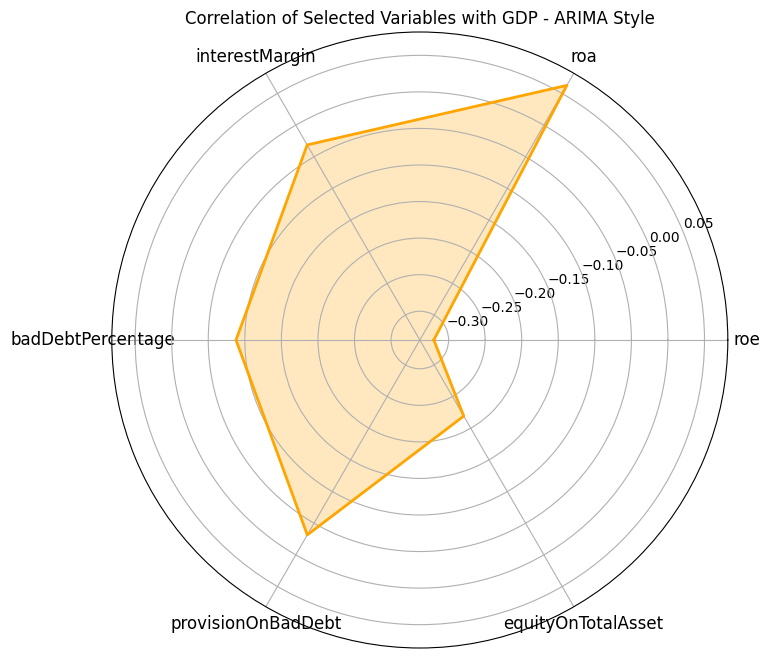

In [12]:
# Prepare data for radar chart
variables = correlation_selected.index
correlation_values = correlation_selected.values
angles = np.linspace(0, 2 * np.pi, len(variables), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))  # Close the radar chart
correlation_values = np.concatenate((correlation_values, [correlation_values[0]]))

# Plot radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.plot(angles, correlation_values, color="orange", linewidth=2, linestyle="solid")
ax.fill(angles, correlation_values, color="orange", alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(variables, fontsize=12)
plt.title("Correlation of Selected Variables with GDP - ARIMA Style")
plt.show()


In [13]:
# Define SARIMA model parameters (p, d, q) x (P, D, Q, s) with quarterly seasonality
p, d, q = 1, 1, 1
P, D, Q, s = 1, 1, 1, 4

# Fit SARIMA model on GDP data
sarima_model = SARIMAX(gdp_series, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_fit = sarima_model.fit(disp=False)

# Display model summary
sarima_fit.summary()


c:\Users\Hii\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\Hii\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\Hii\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Hii\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA pa

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                     Quarterly_GDP   No. Observations:                   44
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                -467.478
Date:                           Wed, 13 Nov 2024   AIC                            944.955
Time:                                   22:05:20   BIC                            953.273
Sample:                               03-31-2013   HQIC                           947.939
                                    - 12-31-2023                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0002    101.801  -2.29e-06      1.000    -199.526     199.525
ma.L1         -0.0049    101.734  -4.78e-05      1.000    -199.400     199.390
ar.S.L4       -0.4300      0.462     -0.932      0.351      -1.335       0.475
ma.S.L4        0.4837      0.404      1.196      0.232      -0.309       1.276
sigma2      1.718e+09   1.94e-05   8.85e+13      0.000    1.72e+09    1.72e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               275.14
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):              28.48   Skew:                            -2.71
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.57e+29. Standard errors may be unstable.
"""

C:\Users\Hii\AppData\Local\Temp\ipykernel_10104\4168602993.py:14: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  forecast_index = pd.date_range(gdp_series.index[-1] + pd.DateOffset(months=3), periods=forecast_periods, freq='Q')


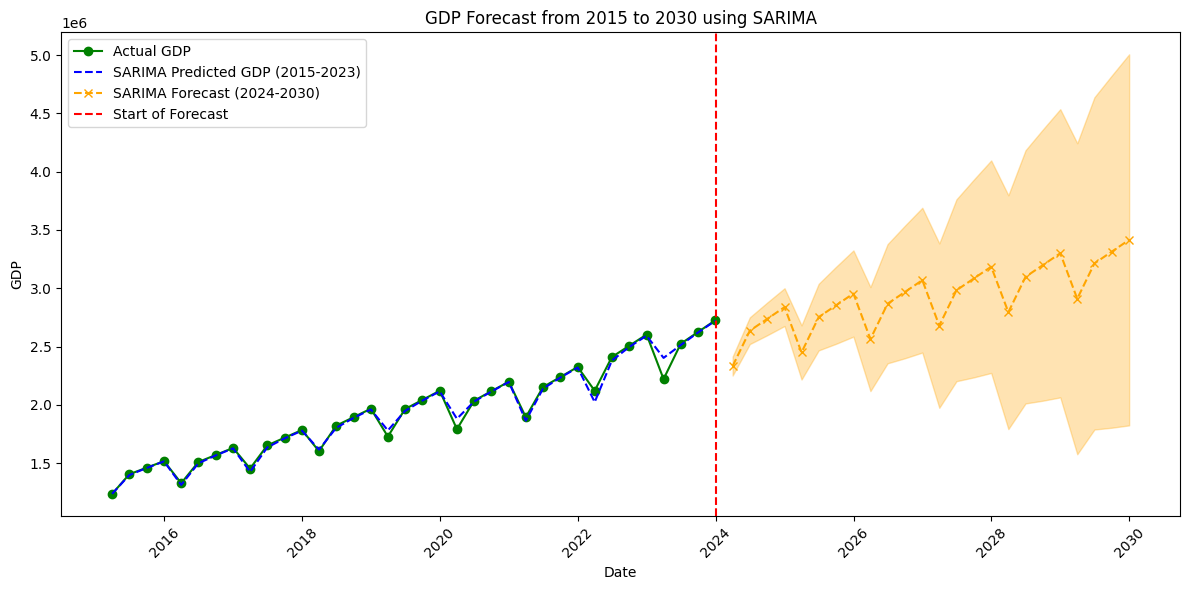

In [ ]:
# Filter the data to start from 2015
gdp_series = gdp_series[gdp_series.index >= "2015-01-01"]

# Forecast period for future dates (6 years into the future, assuming quarterly data)
forecast_periods = 24  # Forecasting 24 quarters, equivalent to 6 years from 2024 to 2030

try:
    # Generate historical predictions starting from 2015 to the last date in the series
    historical_forecast = sarima_fit.get_prediction(start=gdp_series.index[0], end=gdp_series.index[-1])
    historical_forecast_mean = historical_forecast.predicted_mean
    
    # Future forecast from the last date in the series to 2030
    future_forecast = sarima_fit.get_forecast(steps=forecast_periods)
    forecast_index = pd.date_range(gdp_series.index[-1] + pd.DateOffset(months=3), periods=forecast_periods, freq='Q')
    future_forecast_mean = future_forecast.predicted_mean
    future_conf_intervals = future_forecast.conf_int()

    # Plot historical predictions from 2015, and future forecast
    plt.figure(figsize=(12, 6))
    plt.plot(gdp_series, label="Actual GDP", color="green", marker="o")
    plt.plot(historical_forecast_mean, label="SARIMA Predicted GDP (2015-2023)", color="blue", linestyle="--")
    plt.plot(forecast_index, future_forecast_mean, label="SARIMA Forecast (2024-2030)", color="orange", linestyle="--", marker="x")
    plt.fill_between(forecast_index, future_conf_intervals.iloc[:, 0], future_conf_intervals.iloc[:, 1], color='orange', alpha=0.3)
    plt.axvline(x=pd.Timestamp('2024-01-01'), color='red', linestyle='--', label='Start of Forecast')
    plt.title("GDP Forecast from 2015 to 2030 using SARIMA")
    plt.xlabel("Date")
    plt.ylabel("GDP")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    

except Exception as e:
    print(f"An error occurred: {e}")


In [19]:
# Calculate predictions for test data (assuming 80% train, 20% test split in original series)
train_size = int(len(gdp_series) * 0.8)
test_size = len(gdp_series) - train_size
train, test = gdp_series[:train_size], gdp_series[train_size:]

# Re-fit SARIMA on training data and forecast test period
sarima_train_model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_train_fit = sarima_train_model.fit(disp=False)
sarima_test_forecast = sarima_train_fit.get_forecast(steps=test_size)
test_predictions = sarima_test_forecast.predicted_mean

# Calculate MAPE and RMSE
mape = mean_absolute_percentage_error(test, test_predictions) * 100
rmse = np.sqrt(mean_squared_error(test, test_predictions))
print(f"MAPE: {mape:.2f}%")
print(f"RMSE: {rmse:.2f}")


MAPE: 5.09%
RMSE: 128849.52


c:\Users\Hii\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\Hii\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
